The following code works for directed networks and in particular for the
example of the C. Elegans directed neural network **[Watts, D. J. & Strogatz, S. H. Collective dynamics of small-worldnetworks. Nature 393, 440–442 (1998).]** here given in gml format (http://networkdata.ics.uci.edu/data/celegansneural/).

In [38]:
import networkx as nx  # display of networks
from pylab import *    # for fast array operations
# for interactive plots
%matplotlib notebook   

In [39]:
print('networkx version :',nx.__version__)
print('matplotlib version :',matplotlib.__version__)
print('numpy version :',np.__version__)

networkx version : 2.5
matplotlib version : 3.3.1
numpy version : 1.19.1


In [40]:
g = nx.read_gml("celegansneural.gml")

In [41]:
# remove nodes with zero in-degree (repeat until every node has an input)
while True :
    zeroin = [n for n in g.nodes() if g.in_degree(n)==0]
    g.remove_nodes_from(zeroin)
    if len(zeroin)==0 : break

In [42]:
print('CElegans core network')
print('Number of nodes : ',len(g.nodes()))
print('Number of edges : ',len(g.edges()))


CElegans core network
Number of nodes :  268
Number of edges :  2253


In [43]:
# nodes should be labeled from 0 to N-1
g = nx.convert_node_labels_to_integers(g, first_label=0, ordering='decreasing degree', label_attribute=None)
kin = array([g.in_degree(n) for n in range(len(g.nodes()))])
kout = array([g.out_degree(n) for n in range(len(g.nodes()))])
idx = np.argsort(kout)[::-1] # rank indexfield

In [44]:
# number of influencers
infN=15

In [45]:
print('out-degree sequence by rank :\n',kout[idx[:infN]])
print('in-degree sequence by rank :\n',kin[idx[:infN]])

out-degree sequence by rank :
 [39 39 34 34 30 29 27 27 26 25 25 24 24 24 22]
in-degree sequence by rank :
 [43 41 24 24 19 14 31 25  8  7  6 12  5 10  7]


<IPython.core.display.Javascript object>


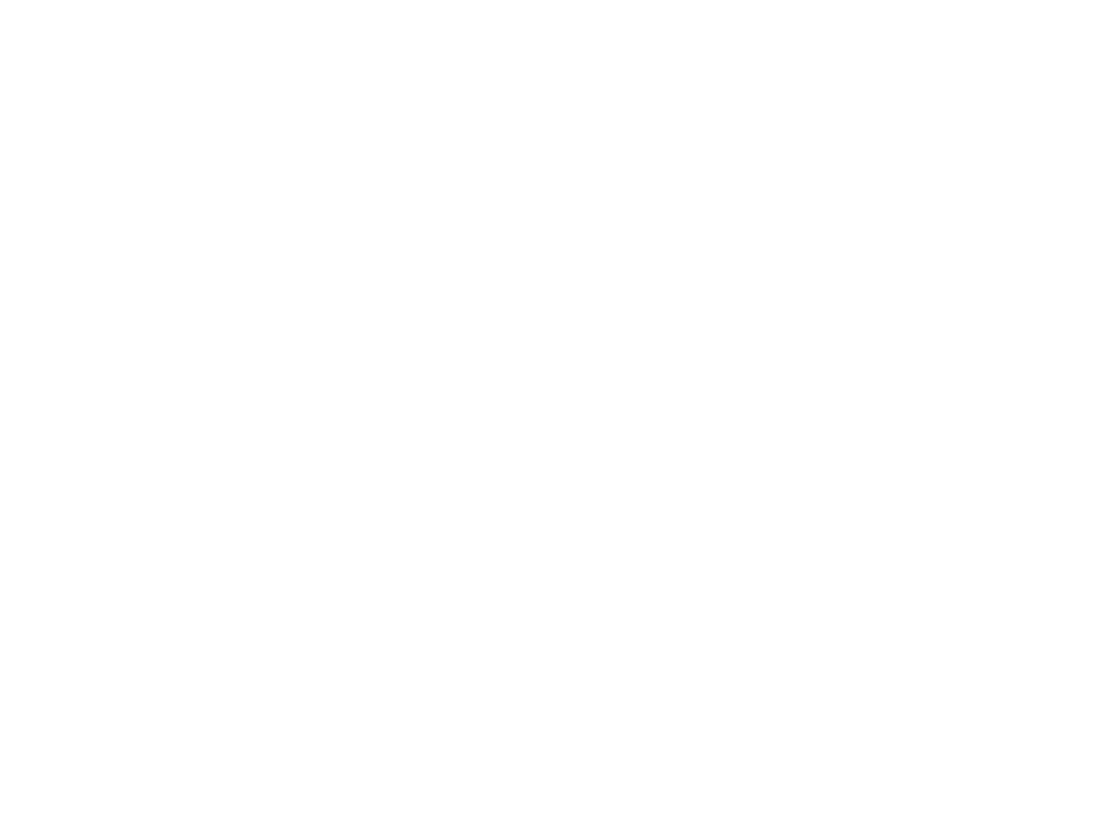

In [46]:
%matplotlib notebook
plot(kout[idx[:infN]],kin[idx[:infN]],'r.',label='influencers')
plot(kout[idx[infN:]],kin[idx[infN:]],'b.',label='peripherals')
xlabel(r'$k_{out}$',fontsize=16,usetex=True)
ylabel(r'$k_{in}$',fontsize=16,rotation=0,usetex=True)
legend()
show()

In [47]:
E = [e for e in g.edges()]+[(e[1],e[0]) for e in g.edges()]

gb = nx.from_edgelist(E) # create symmetric graph for better spring layout
                         # (makes hubs look like stars)

noe = []                 # list of peripheral-peripheral edges
noe2 = []                # same as noe but inverse edge directions
infbb = []              # influencer backbone
infbb2 = []              # influencer backbone

for e in g.edges() :
    if not((e[0] in idx[:infN]) or (e[1] in idx[:infN])) : 
        # keep only edges from and to influencers
        noe.append(e)
        noe2.append((e[1],e[0]))        
        
g.remove_edges_from(noe)   # remove inter-peripheral edges from graph g
gb.remove_edges_from(noe)  # remove inter-peripheral edges from graph gb
gb.remove_edges_from(noe2) # remove inter-peripheral edges from graph gb

yese = list(g.edges()) # remaining edges in gb from and to influencers

In [48]:
# arrange influencers on a circle
pos0 = dict([(idx[n],(cos(2*pi/infN*n),sin(2*pi/infN*n))) for n in range(infN)])

In [49]:
pos0

{1: (1.0, 0.0),
 2: (0.9135454576426009, 0.40673664307580015),
 5: (0.6691306063588582, 0.7431448254773941),
 4: (0.30901699437494745, 0.9510565162951535),
 11: (-0.10452846326765333, 0.9945218953682734),
 13: (-0.4999999999999998, 0.8660254037844387),
 3: (-0.8090169943749473, 0.5877852522924732),
 10: (-0.9781476007338056, 0.20791169081775973),
 21: (-0.9781476007338057, -0.20791169081775907),
 23: (-0.8090169943749475, -0.587785252292473),
 24: (-0.5000000000000004, -0.8660254037844385),
 15: (-0.10452846326765423, -0.9945218953682733),
 26: (0.30901699437494723, -0.9510565162951536),
 22: (0.6691306063588578, -0.7431448254773946),
 27: (0.9135454576426005, -0.40673664307580093)}

In [50]:
pos = nx.spring_layout(gb,pos=pos0,fixed=idx[:infN])
oldpos = dict((n,array(pos[n])) for n in pos.keys()) # copy of pos

In [51]:
pos = dict((n,array(oldpos[n])) for n in oldpos.keys()) # restore positions
for n in pos.keys() :
    p = pos[n]
    if sqrt(p.dot(p))>2.0 :
        pos[n]/=3.5      # pull in disconnected peripherals

In [52]:
dr=0.9
for n in range(infN) : 
    pos[idx[n]][0]=dr*cos(2*pi/infN*n)
    pos[idx[n]][1]=dr*sin(2*pi/infN*n)

In [53]:
col = np.array([0.0 for n in range(len(g.nodes()))])
cm = np.zeros(len(g.nodes()))
#col[idx[:infN]]=np.random.permutation(arange(1,infN+1))/infN
col[idx[:infN]]=arange(1,infN+1)/infN
for e in g.edges() :
    if (e[0] in idx[:infN]) and (not e[1] in idx[:infN]) :
        col[e[1]]+=col[e[0]]
        cm[e[1]]+=1.0
    if (e[1] in idx[:infN]) and (not e[0] in idx[:infN]) :
        col[e[0]]+=col[e[1]]
        cm[e[0]]+=1.0
            
cm[cm==0]=1.0
col/=cm


In [54]:
arange(len(g.nodes()))[col==0]

array([ 65,  78,  80,  87,  88,  89,  92,  95,  98, 100, 106, 115, 118,
       119, 127, 129, 131, 136, 151, 163, 167, 168, 180, 182, 185, 186,
       188, 194, 197, 198, 199, 200, 201, 202, 209, 210, 211, 212, 213,
       214, 215, 216, 218, 219, 220, 221, 223, 224, 225, 226, 228, 229,
       235, 236, 242, 243, 244, 246, 247, 251, 252, 256, 257, 261, 262,
       264, 265, 267])

<IPython.core.display.Javascript object>


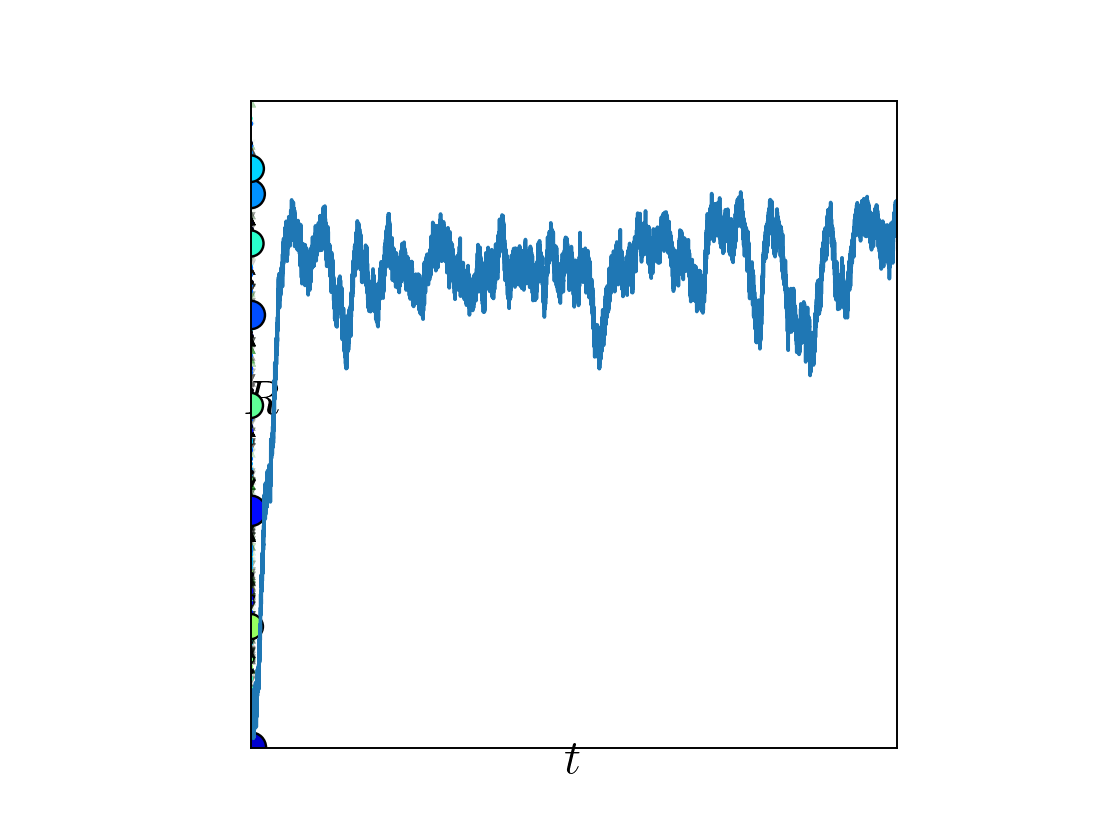

In [55]:
%matplotlib inline
nx.draw_networkx_edges(g,pos=pos,edgelist=noe,edge_color='g',arrows=True,alpha=0.05,width=0.1)
nx.draw_networkx_edges(g,pos=pos,edgelist=yese,edge_color='k',arrows=True,alpha=0.2,width=0.1)
nx.draw_networkx_nodes(g,pos=pos,nodelist=idx[:],node_color=col[idx[:]],node_size=1,alpha=1,cmap='jet',vmin=0,vmax=1)
nx.draw_networkx_nodes(g,pos=pos,nodelist=arange(len(g.nodes()))[col==0],node_color='k',node_size=1,alpha=1,cmap='jet',vmin=0,vmax=1)
nx.draw_networkx_nodes(g,pos=pos,nodelist=idx[:infN], node_size=4*kout[idx[:infN]],node_color=col[idx[:infN]],alpha=1,cmap='jet',vmin=0,vmax=1,edgecolors='k')
axis('scaled')
#savefig('CElegans_15InfluencerNW.pdf',dpi=300,bbox_size='tight')
show()

In [56]:
# savefig('CElegans_15InfluencerNW_.pdf',dpi=300,bbox_inches='tight')

In [57]:
E = []                 # create edge list for simulations
w = []                 # list of edge weights for simulation
for e in yese :   # for all edges from and to a hub
    E.append(e[::-1])  # invert edge direction (a->b) in networkx notation becomes (b<-a) in the simulation
    w.append(1.0)      # weight of hub edges
for e in noe :         # for interperipheral edges
    E.append(e[::-1])  
    w.append(0.01)     # weight of interperipheral edges

E=np.array(E)  # make numpy array
w=np.array(w)  # make numpy array
N=len(g.nodes())          # number of nodes

In [58]:
D=np.ones(N)*0.01         # noise in the peripherals

beta=10
q=1.0

D[idx[:infN]]=q*beta      # noise in the influencers (q=D/beta)

ohm = np.ones(N)          # frequencies in the peripherals
ohm[idx[:infN]] = beta    # frequencies in the influencers

lam = 0.5                 # coupling strength

$$
    \dot \vartheta_n = \omega_n \left(1 + \frac{\lambda}{\mu_n}\sum_m E_{nm}\sin(\vartheta_m-\vartheta_n-\alpha)\right)\qquad \mu_n = \sum_m E_{nm}
$$

These phase equations are not the same as in the paper but completely mappable as shown in the **Supplemental Information section F** (hence the somewhat odd values for $\Delta\Omega$, $\beta$ and $\Lambda$ in the paper)

In [59]:
mu = bincount(E[:,0],weights=w)  # in-degree weights
mu[mu==0]=1 # saveguard, should not happen (only for zero in-degree)

In [60]:
th=np.random.random(N)*2*pi # phase randomization

In [61]:
steps=200000     # simulation time = steps*dt
skip=20
dt=0.0005

alpha=-0.1        # phase frustration

Rhist=np.zeros(steps)  # record of order parameter

dth=np.zeros(N)        # phase velocity deterministic part

L=len(E)            # number of edges

pctnow=0.0        # percentage counter
pctlast=-1.0


for n in range(steps) :
    Rhist[n] = sqrt(mean(cos(th))**2+mean(sin(th))**2)  # record the mean field
    
    pctnow=floor(100*n/(steps))                   # calculate progress
    if pctnow!=pctlast :
        print(pctnow,' : ',Rhist[n],end='\r')   # print progress and mean field
        pctlast=pctnow

    for i in range(skip) :

        #--------------------------------------------------------------------------------
        # the following is numpy wizardry to avoid the explicit python loop
        # for e in range(L) : dth[E[e,0]]+=w*sin(th[E[e,1]]-th[E[e,0]]-alpha)

        fwd = w*sin(th[E[:,1]]-th[E[:,0]]-alpha)  # calculate the directed edge 
                                                    #coupling contributions
        dth = bincount(E[:,0],weights=fwd)        # add the coupling contributions to the 
                                                    # phase velocities of the corresponding nodes
                                                  # bincount is equivalent to accumarray in MATLAB
        #--------------------------------------------------------------------------------


        dth*=ohm*lam/mu # normalize coupling terms and multiply with frequency
        dth+=ohm        # add frequency

        # new phases from old phases + deterministic phase velocity + individual noise terms
        th = np.mod(th+dth*dt+sqrt(2*D*dt)*np.random.randn(N),2*pi)
    
print('\ndone.')

99.0  :  0.79277683571664835
done.


In [62]:
import pickle as pl # can save any python object (e.g. plots) to a binary file for later modification

In [63]:
k=10
plot(dt*skip*arange(0,steps,k),Rhist[::k]) # skip every 10 points 
                                            # otherwise the plot data is too large

ylim(0,1)
xlim(0,steps*skip*dt)
gca().set_aspect(steps*skip*dt)
xlabel(r'$t$',fontsize=20,usetex=True,labelpad=-3)
ylabel(r'$R$',fontsize=20,usetex=True,labelpad=-5,rotation=0)
gca().tick_params(labelsize=14)

#savefig('CElegans_15InfluencerNW_q1_0_D001_long_.pdf',dpi=300,bbox_inches='tight') # save as pdf

#f=open('CElegans_15InfluencerNW_q1_0_D001_long_.fig','wb')     # save python plot for editing later
#pl.dump(gcf(),f)
#f.close()

show()